
# Equation of State (EOS) for a Real Gas
## Chem 113, Spring 2021, Liang Shi

In General Chemistry, you have learned the ideal gas law:

$$p V = n R T.$$ 						

If we define molar volume as

$$ \bar{V}=\frac{V}{n},$$

the ideal gas law reads

$$ P \bar{V} = R T \;\;\;\textrm{or}\;\;\; P = \frac{RT}{\bar{V}}.$$

In order to quantify the non-ideality of a real gas, we define *compressibility factor* as

$$ Z=\frac{P \bar{V}}{RT}. $$


In [64]:
# load some libraries for numerical operations and plotting
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

Set the parameters first (*units are very important*)

In [65]:
# Parameters
R = 0.082058   # L atm / (mol K)
T = 300.0     # K

Load experimental data at 300 K (Ref: [L. A. Rowley, D. Nicholson, and N. G. Parsonage. J. Comput. Phys. 17 (1975) 401](https://www.sciencedirect.com/science/article/pii/002199917590042X))

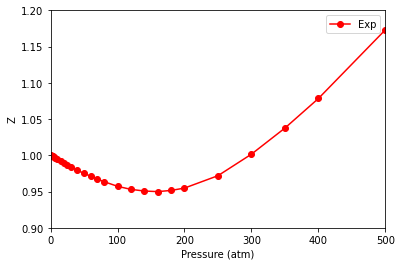

In [66]:
# Load the data 
exp = np.loadtxt('Z_300.txt') # the exp data file has 2 columns
P_exp = exp[:,0] # the 1st column is the pressure in the unit of atm
Z_exp = exp[:,1] # the 2nd column is Z

# take a look at the data
plt.plot(P_exp, Z_exp, 'r-o', label="Exp")
plt.xlabel('Pressure (atm)')
plt.ylabel('Z')
plt.xlim((0,500))
plt.ylim((0.9,1.2))
plt.legend()
plt.show()

Compute $\bar{V}$ first from $Z$

$$\bar{V} = \frac{ZRT}{P}$$

In [67]:
# compute Vbar from Z, Vbar is in the unit of L/mol
Vbar = np.divide(Z_exp * R * T, P_exp)

In order to fit the $P$ vs. $\bar{V}$ according to the vdW equation, we have to define a function for vdw equation.

$$ P = \frac{RT}{\bar{V}-b}-\frac{a}{\bar{V}^2} $$

In [68]:
def vdw(x, a, b):
    '''
    x: Vbar, molar volume
    a, b: vdW parameters
    '''
    return R*T/(x-b)-a/x/x

popt, pcov = curve_fit(vdw, Vbar, P_exp, [1.3, 0.03])
a = popt[0]
b = popt[1]
print("a value from fit (L^2 atm / mol^2):", a)
print("b value from fit (L / mol):", b)

a value from fit (L^2 atm / mol^2): 0.9727877797051426
b value from fit (L / mol): 0.026685070517994635


In [70]:
# compute predicted P and Z from vdw equation
P_vdw = vdw(Vbar,*popt)
Z_vdw = np.multiply(P_vdw, Vbar)/R/T

Plot the results and compare them

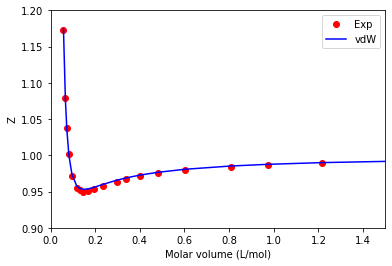

In [73]:
plt.plot(Vbar, Z_exp, 'ro', label="Exp")
plt.plot(Vbar, Z_vdw, 'b-', label="vdW")
plt.xlabel('Molar volume (L/mol)')
plt.ylabel('Z')
plt.xlim((0,1.5))
plt.ylim((0.9,1.2))
plt.legend()
plt.show()

Figure out the rough size of the molecule, using 

$$ b = \frac{2\pi \sigma^3}{3}N_A $$

In [72]:
# make sure the units are correct
# b: L/mol = dm^3 / mol
# NA = 6.02214076e23 /mol
# sigma will be in dm, needs to time 10^9 to Angstrom
NA = 6.02215076e23
d = (3.0*b/2/np.pi/NA)**(1.0/3.0)*1e9
print("The rough estimate of the diameter of the molecule in Angstrom:", d)

The rough estimate of the diameter of the molecule in Angstrom: 2.765791085730022


This molecule is Argon, and its $\sigma$ is commonly taken to be 3.41 Angstrom (Table 16.7), and the parameter $b$ for Ar is 0.03183 L/mol (Table 16.3). Our simple estimates based on a single set of experimental data are reasonably good, slightly underestimating both $b$ and $\sigma$. 